In [1]:
import pandas as pd
import numpy as np


In [2]:
data=pd.read_csv('Downloads/indian_liver_patient.csv')
data.head(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
data.Dataset.unique()
data.count()

Age                           583
Gender                        583
Total_Bilirubin               583
Direct_Bilirubin              583
Alkaline_Phosphotase          583
Alamine_Aminotransferase      583
Aspartate_Aminotransferase    583
Total_Protiens                583
Albumin                       583
Albumin_and_Globulin_Ratio    579
Dataset                       583
dtype: int64

In [4]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [5]:
mean=data.Albumin_and_Globulin_Ratio.mean()
mean
data=data.fillna({'Albumin_and_Globulin_Ratio':mean})
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [6]:
gender_dummies=pd.get_dummies(data['Gender'])


In [7]:
gender_dummies.head(2)

,Female,Male
0,1,0
1,0,1


In [8]:
X=data.drop(['Gender'],axis=1)
X.head(3)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1


In [9]:
X=pd.concat([X,gender_dummies],axis=1)
X.head(3)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Female,Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1


In [10]:
Y=X['Dataset']
Y.head(3)

0    1
1    1
2    1
Name: Dataset, dtype: int64

In [11]:
X=X.drop(['Dataset'],axis=1)
X.head(3)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Female,Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,1


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

C:\Users\Harikumar\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=10,test_size=.35)

In [14]:
logistic_models={}
training_scores=[]
testing_scores=[]
for alpha in [10,1,0.1,0.01,0.001]:
    lr=LogisticRegression(C=alpha,penalty='l1').fit(x_train,y_train)
    training_scores.append(lr.score(x_train,y_train))
    testing_scores.append(lr.score(x_test,y_test))
    logistic_models[alpha]=lr

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

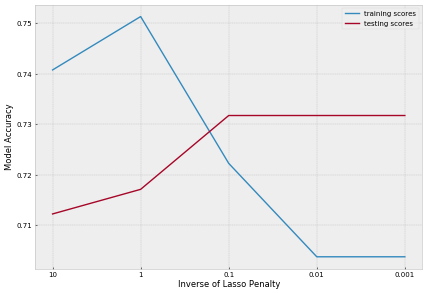

In [16]:
plt.figure(dpi=50,figsize=[10,7])
plt.xlabel('Inverse of Lasso Penalty')
plt.ylabel('Model Accuracy')
plt.plot(training_scores,label="training scores")
plt.plot(testing_scores,label="testing scores")
plt.xticks(range(5),[10,1,0.1,0.01,0.001])
plt.legend(loc="best")

In [17]:
# Create LogisticRegression model1
log_model = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
# Fit our data
log_model.fit(X,Y)

# Check our accuracy
log_model.score(X,Y)

print("Model Accuracy: {:.2f}".format(log_model.score(X,Y)))
log_model.coef_

Model Accuracy: 0.72


array([[-0.01074793, -0.15121874, -0.05678232, -0.0010844 , -0.00880268,
        -0.00340686,  0.        ,  0.2371441 ,  0.        ,  0.        ,
         0.        ]])

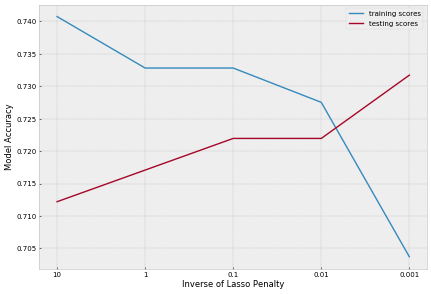

In [19]:
logistic_models={}
training_scores=[]
testing_scores=[]
for alpha in [10,1,0.1,0.01,0.001]:
    lr=LogisticRegression(C=alpha,penalty='l2').fit(x_train,y_train)
    training_scores.append(lr.score(x_train,y_train))
    testing_scores.append(lr.score(x_test,y_test))
    logistic_models[alpha]=lr
plt.figure(dpi=50,figsize=[10,7])
plt.xlabel('Inverse of Lasso Penalty')
plt.ylabel('Model Accuracy')
plt.plot(training_scores,label="training scores")
plt.plot(testing_scores,label="testing scores")
plt.xticks(range(5),[10,1,0.1,0.01,0.001])
plt.legend(loc="best")

In [23]:
# Create LogisticRegression model01
log_model = LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
# Fit our data
log_model.fit(X,Y)

# Check our accuracy
log_model.score(X,Y)

print("Model Accuracy: {:.2f}".format(log_model.score(X,Y)))
log_model.coef_

Model Accuracy: 0.72


array([[-0.01229758, -0.12158267, -0.10437243, -0.00118394, -0.00879772,
        -0.0036185 ,  0.06119369,  0.10800595,  0.06151887,  0.02029659,
         0.01414824]])

In [83]:
Y.value_counts()

1    416
2    167
Name: Dataset, dtype: int64

In [34]:
Y=Y.map({2:0,1:1})

In [35]:
Y.value_counts()

1    416
0    167
Name: Dataset, dtype: int64

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score

30 trees
C : stat- 0.704190177338

50 trees
C : stat- 0.725227429756

100 trees
C : stat- 0.732381391064

200 trees
C : stat- 0.737649700599

500 trees
C : stat- 0.733640891294

1000 trees
C : stat- 0.736390200368

2000 trees
C : stat- 0.736145497467



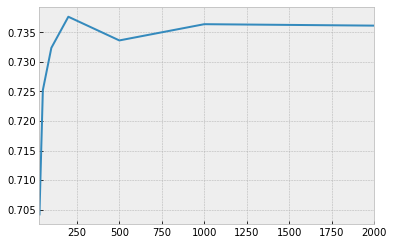

In [36]:
results=[]
n_estimator_options=[30,50,100,200,500,1000,2000]
for estimators in n_estimator_options:
    model=RandomForestRegressor(estimators,oob_score=True,n_jobs=-1,random_state=42)
    model.fit(X,Y)
    print(estimators ,"trees")
    roc=roc_auc_score(Y,model.oob_prediction_)
    print("C : stat-",roc)
    results.append(roc)
    print("")
pd.Series(results,n_estimator_options).plot()

auto -No.of features
C-Stat  0.736390200368

sqrt -No.of features
C-Stat  0.75082767158

log2 -No.of features
C-Stat  0.75082767158

0.9 -No.of features
C-Stat  0.738369415016

0.2 -No.of features
C-Stat  0.756801301244



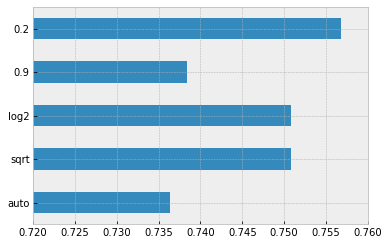

In [43]:
results=[]
max_feature_options=["auto","sqrt","log2",0.9,0.2]
for features in max_feature_options:
    model=RandomForestRegressor(n_estimators=1000,oob_score=True,n_jobs=-1,random_state=42,max_features=features)
    model.fit(X,Y)
    print(features ,"-No.of features")
    roc=roc_auc_score(Y,model.oob_prediction_)
    print("C-Stat ",roc)
    results.append(roc)
    print("")
pd.Series(results,max_feature_options).plot(kind='barh',xlim=(0.72,0.76));

1 min_samples
C-stat  0.756801301244

2 min_samples
C-stat  0.754922846614

3 min_samples
C-stat  0.75034546292

4 min_samples
C-stat  0.746732496545

5 min_samples
C-stat  0.743623330263

6 min_samples
C-stat  0.742673307232

7 min_samples
C-stat  0.741766467066

8 min_samples
C-stat  0.740255066789

9 min_samples
C-stat  0.740888415477

10 min_samples
C-stat  0.73877245509



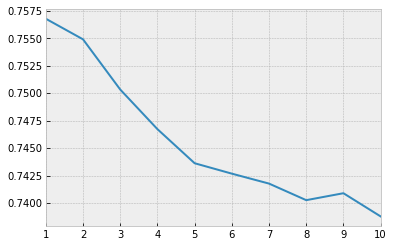

In [45]:
results=[]
min_sample_leafs=[1,2,3,4,5,6,7,8,9,10]
for samples in min_sample_leafs:
    model=RandomForestRegressor(n_estimators=1000,
                                oob_score=True,n_jobs=-1,max_features=0.2,
                                random_state=42,min_samples_leaf=samples)
    model.fit(X,Y)
    print(samples ,"min_samples")
    roc=roc_auc_score(Y,model.oob_prediction_)
    print("C-stat ",roc)
    results.append(roc)
    print("")
pd.Series(results,min_sample_leafs).plot()

In [47]:
model=RandomForestRegressor(n_estimators=1000,oob_score=True,n_jobs=-1,min_samples_leaf=1,max_features=0.2,random_state=42)
model.fit(X,Y)
roc=roc_auc_score(Y,model.oob_prediction_)
print("C-stat ",roc)

C-stat  0.756801301244


In [48]:
print(model.predict(X))

[ 0.853  0.995  0.982  0.817  0.989  0.829  0.81   0.804  0.129  0.922
  0.936  0.977  0.296  0.855  0.818  0.268  0.906  0.224  0.99   0.99
  0.961  0.982  0.991  0.915  0.219  0.986  0.986  0.995  0.194  0.141
  0.976  0.889  0.145  0.121  0.121  0.944  0.145  0.995  0.941  0.992
  0.911  0.322  0.346  0.978  0.245  0.302  0.867  0.964  0.86   0.994
  0.79   0.81   0.986  0.901  0.994  0.994  0.211  0.281  0.888  0.162
  0.813  0.935  0.935  0.925  0.972  0.962  0.887  0.881  0.838  0.232
  0.901  0.895  0.856  0.723  0.799  0.177  0.886  0.936  0.202  0.978
  0.959  0.791  0.231  0.927  0.81   0.842  0.187  0.945  0.828  1.     0.996
  0.995  0.995  0.991  0.986  0.905  0.995  0.944  0.95   0.925  0.183
  0.221  0.808  0.242  0.844  0.127  0.127  0.099  0.099  0.335  0.152
  0.965  0.209  0.903  0.328  0.339  0.956  0.987  0.997  0.995  0.997
  0.996  0.287  0.809  0.218  0.253  0.956  0.969  0.894  0.976  0.971
  0.252  0.176  0.862  0.835  0.985  0.989  0.968  0.968  0.826  0.217
